Enter the number of stocks you want in your portfolio to be:  
3
Let's start. Please be careful: write TICKER SYMBOL, not a company's actual name (e.g. AAPL, F, PG): 

NOTE: If you include index in your portfolio, please use ^ before printing it (e.g. ^DJI) 

Ticker symbol: 
PG
Ticker symbol: 
MSFT
Ticker symbol: 
GE
Please, indicate the portion of each stock in your portfolio. remember, portions should sum up to 1! 

Weight of the stock in portfolio:  
0.3
Weight of the stock in portfolio:  
0.4
Weight of the stock in portfolio:  
0.3
Please, choose start date for portfolio in the following format: YYYY/MM/DD 
2019-1-1
Please, choose end date for portfolio in the following format: YYYY/MM/DD 
2020-6-6
You chose the following stocks:  PG;MSFT;GE;  

Adjusted Closing prices for first 10 days of given period: 

                   PG        MSFT        GE
Date                                       
2019-01-02  87.674026   99.099190  7.701778
2019-01-03  87.059319   95.453529  7.711346
201

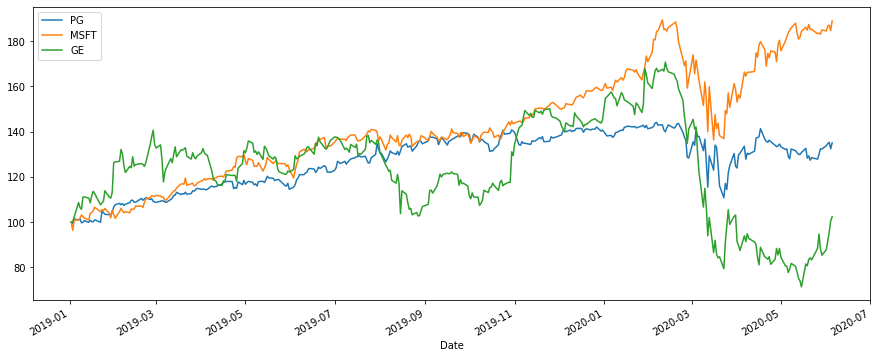

In [279]:
#This program is designed to extract financial performance of different companies quoted on stock exchanges 
#or indexes from yahoo, build portfolio based on user's input and provide historical information of its performance
#over chosen period of time. 
#
#It asks user for # of companies in portfolio, stock tickers and start and end dates of portfolio performance. 
#Then, it calculates risk and return of each portfolio's security, correlation between securities and portfolio's
#both risk and return. It also prints adjusted closing prices of each company over first 10 days and last 10 days
#  over given period of time, as well as plots the graph of companies' performance in the end. 




#importing required libraries

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

#declaring needed variables/arrays
arr = []
weights = np.array([])
sum = 0
ccc = []

#writing a fucntion that will be needed
def listToString(st):   
    strng = " "  
    for i in st:  
        strng += i + ';'  
    return strng  

    

#ussing array to store portfolio of companies/ indexes based on user's input

n = int(input("Enter the number of stocks you want in your portfolio to be:  \n"))

print("Let's start. Please be careful: write TICKER SYMBOL, not a company's actual name (e.g. AAPL, F, PG): \n")

print("NOTE: If you include index in your portfolio, please use ^ before printing it (e.g. ^DJI) \n")

for i in range(n):
    v = input("Ticker symbol: \n")
    arr.append(v)

    

print("Please, indicate the portion of each stock in your portfolio. remember, portions should sum up to 1! \n")

#assigns to each company its portion in portfolio.
#Morever, it checks that all portions sum up to 1, prompts user for reentering values otherwise.


r = False
while r == False:
    for i in arr:
        v = float((input("Weight of the stock in portfolio:  \n")))
        ccc.append(v)
        sum = sum + v
        
    if sum == 1.0:
        r = True
        for i in arr:
            weights = np.append(weights, v)
    else:
        print("Please, provide the weights that sum up to 1 \n")
        sum = 0
        ccc.clear()


      
#asks user for period of time of portfolio performance

start_time = input("Please, choose start date for portfolio in the following format: YYYY/MM/DD \n")
end_time = input("Please, choose end date for portfolio in the following format: YYYY/MM/DD \n")

print("You chose the following stocks:", listToString(arr), " \n") 
      
#piece of code that stands for reading required data from yahoo and storing it in a dataframe
#that will be used for upcoming calculations

dn = pd.DataFrame()
for i in arr:
    dn[i] = wb.DataReader(i, data_source = 'yahoo', start=start_time, end = end_time )['Adj Close']
    
#prints string, however, not practical while working with huse data;
#print(dn.to_string()) 

print("Adjusted Closing prices for first 10 days of given period: \n")
print(dn.head(10), "\n")
print("Adjusted Closing prices for last 10 days of given period: \n")
print(dn.tail(10), "\n")


#Various calculations
           

returns = dn/dn.shift(1)-1                             #calculates day-from day returns for each portfolio's company      
annual_returns = returns.mean()*250                    #annualizes (or,more precisely, makes returns be representable over 
                                                       #given period of time)

    
print("Returns for portfolio companies over given period of time: \n")
for i in range(n):
    print(arr[i], ": ", round(annual_returns[i]*100, 2) , "% \n")

    

annual_std = returns.std()*250 **0.5                    #calculates standard deviation over given period of time

print("Risks for portfolio companies over given period of time: \n")
for i in range(n):
    print(arr[i], ": ", round(annual_std[i]*100, 2) , "% \n")


print("Correlations between securities in portfolio: \n")

corr_matrix = returns.corr()                             #getting a correlation matrix
print(corr_matrix, "\n")


portf_vol = (np.dot(weights.T, np.dot(returns.cov()*250, weights )))**0.5    #calculating overall portfolio variance

print("Portfolio variation is: \n")
print(str(round(portf_vol , 5)*100) + '% \n')
    


pfolio_1 = (np.dot(annual_returns, weights) * 100)     #calculating overall portfolio return

print ("Overall portfolio return over given period of time is: \n")
print(str(round(pfolio_1 , 3)) + '% \n')

#plotting the graph of normalized performance of each of portfolio's companies
print("Finally, here is a graph of normalized performance of portfolio companies over given period: \n")   
(dn / dn.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()  


